In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I flew from Malaga via LHR to...
1,✅ Trip Verified | Milan to Miami return via L...
2,✅ Trip Verified | BA created a new low-cost s...
3,✅ Trip Verified | I flew with British Airway...
4,✅ Trip Verified | Manchester to Copenhagen vi...


In [7]:
df

,reviews
0,Not Verified | I flew from Malaga via LHR to...
1,✅ Trip Verified | Milan to Miami return via L...
2,✅ Trip Verified | BA created a new low-cost s...
3,✅ Trip Verified | I flew with British Airway...
4,✅ Trip Verified | Manchester to Copenhagen vi...
...,...
995,✅ Trip Verified | I booked a flight from Buch...
996,✅ Trip Verified | London to Calgary. Thank yo...
997,"✅ Trip Verified | Vancouver to London, we wer..."
998,Not Verified | \r\nMiami to London Heathrow w...


In [8]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [9]:
df

,reviews
0,I flew from Malaga via LHR to Boston on the...
1,Milan to Miami return via London. Worst busi...
2,BA created a new low-cost subsidiary in BA E...
3,I flew with British Airways from Heathrow t...
4,Manchester to Copenhagen via London on 30th ...
...,...
995,I booked a flight from Bucharest to London a...
996,"London to Calgary. Thank you to James, a Clu..."
997,"Vancouver to London, we were upgraded to bus..."
998,\r\nMiami to London Heathrow with British Ai...


In [10]:

import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...
1,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...
2,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...
3,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...
4,Manchester to Copenhagen via London on 30th ...,Manchester to Copenhagen via London on th Apr...


In [11]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hiran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hiran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hiran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hiran\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hiran\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)..."
1,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No..."
2,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...,"[(BA, n), (created, v), (new, a), (low, a), (c..."
3,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...,"[(flew, v), (British, a), (Airways, n), (Heath..."
4,Manchester to Copenhagen via London on 30th ...,Manchester to Copenhagen via London on th Apr...,"[(Manchester, n), (Copenhagen, n), (via, None)..."


In [13]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly Malaga via LHR Boston th May arrival Bos...
1,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No...",Milan Miami return via London Worst business...
2,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...,"[(BA, n), (created, v), (new, a), (low, a), (c...",BA create new low cost subsidiary BA Eurofly...
3,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...,"[(flew, v), (British, a), (Airways, n), (Heath...",fly British Airways Heathrow Hannover Althou...
4,Manchester to Copenhagen via London on 30th ...,Manchester to Copenhagen via London on th Apr...,"[(Manchester, n), (Copenhagen, n), (via, None)...",Manchester Copenhagen via London th April Ai...


In [14]:

df[['reviews','Lemma']]

,reviews,Lemma
0,I flew from Malaga via LHR to Boston on the...,fly Malaga via LHR Boston th May arrival Bos...
1,Milan to Miami return via London. Worst busi...,Milan Miami return via London Worst business...
2,BA created a new low-cost subsidiary in BA E...,BA create new low cost subsidiary BA Eurofly...
3,I flew with British Airways from Heathrow t...,fly British Airways Heathrow Hannover Althou...
4,Manchester to Copenhagen via London on 30th ...,Manchester Copenhagen via London th April Ai...
...,...,...
995,I booked a flight from Bucharest to London a...,book flight Bucharest London return airport ...
996,"London to Calgary. Thank you to James, a Clu...",London Calgary Thank James Club World flight...
997,"Vancouver to London, we were upgraded to bus...",Vancouver London upgrade business class airp...
998,\r\nMiami to London Heathrow with British Ai...,Miami London Heathrow British Airways Top de...


In [15]:

!pip install vaderSentiment

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly Malaga via LHR Boston th May arrival Bos...,-0.7184,Negative
1,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No...",Milan Miami return via London Worst business...,-0.9148,Negative
2,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...,"[(BA, n), (created, v), (new, a), (low, a), (c...",BA create new low cost subsidiary BA Eurofly...,0.9898,Positive
3,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...,"[(flew, v), (British, a), (Airways, n), (Heath...",fly British Airways Heathrow Hannover Althou...,-0.8176,Negative
4,Manchester to Copenhagen via London on 30th ...,Manchester to Copenhagen via London on th Apr...,"[(Manchester, n), (Copenhagen, n), (via, None)...",Manchester Copenhagen via London th April Ai...,0.4588,Neutral


In [17]:

vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    475
Negative    416
Neutral     109
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f936229cd0>,
 [Text(0.08630502583501973, 1.096609065490349, 'Positive'),
  Text(-0.4495139927377137, -1.003960741430161, 'Negative'),
  Text(1.271619409691705, -0.45330351520291584, 'Neutral')])

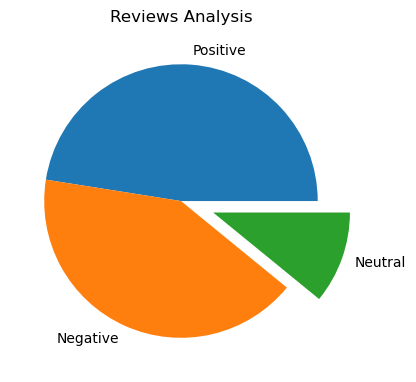

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25))

In [19]:
df.to_csv("BA_reviews.csv")

In [22]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 495.5 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


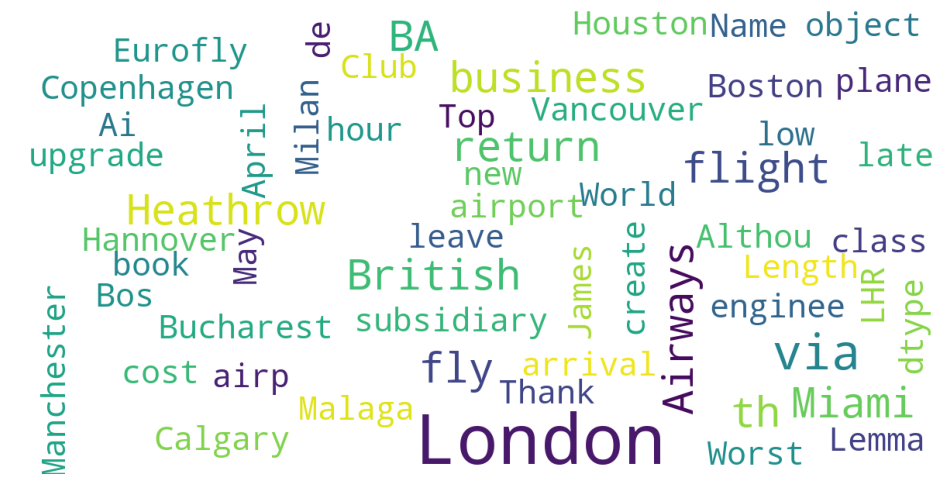

In [23]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)